In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Batch Gradient Descent

### Objective

Gradient Descent can minimize any cost function. Implement Gradient Descent to minimize _Squared Error Cost function_ 

<a id="#[1]-Setup"></a>
# [1] Setup

### Import and configure required libraries

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable
from prettytable import PrettyTable


# Library versions used in below EDA.
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("PrettyTable version:", prettytable.__version__)

# Configure NumPy.
# Set `Line width` to Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

# Configure Pandas.
# Set display width to maximum 130 characters in the output, post which it will continue in next line.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")  # Set white background with grid.
sns.set_palette("deep")  # Set color palette.
sns.set_context("paper", font_scale=1.5)  # Set font to scale 1.5 more than normal.

NumPy version: 1.21.5
Pandas version: 1.4.2
Matplotlib version: 3.5.1
Seaborn version: 0.11.2
PrettyTable version: 3.3.0


<IPython.core.display.Javascript object>

#### Common functions

In [3]:
def get_shape(np_array):
    if not isinstance(np_array, np.ndarray):
        raise ValueError(f"Received {type(np_array)} instead of numpy array.")

    if np_array.size == 0:
        raise ValueError(f"Received empty numpy array.")

    shape = list(np_array.shape)
    return (shape.pop(), None) if len(shape) == 1 else (shape[0], shape[1])


ENABLE_LOG = False


def text(*args):
    """
    Function to print() input string when logging is enabled.
    """
    if ENABLE_LOG is True:
        print(*args)


def title(title_str, padding=[1, 1], line_style="="):
    """
    Function to print() input string with some styles, when logging is enabled.
    """
    if ENABLE_LOG is True:
        pad_top, pad_bot = padding
        pt = "\n" * pad_top
        pb = "\n" * pad_bot
        print(pt + title_str + "\n" + line_style * len(title_str) + pb)

<IPython.core.display.Javascript object>

#### Load data-points from the `.csv` file

In [4]:
uv_df = pd.read_csv("./univariate_data_points.csv")
uv_df.head()

,X,Y
0,171,183
1,15,84
2,9,85
3,219,228
4,154,199


<IPython.core.display.Javascript object>

# [2] Data Analysis

In [5]:
rows, cols = uv_df.shape

print("Rows:", rows)
print("Columns:", cols)

Rows: 500
Columns: 2


<IPython.core.display.Javascript object>

In [6]:
uv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       500 non-null    int64
 1   Y       500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


<IPython.core.display.Javascript object>

In [7]:
uv_df.apply(max)

X    298
Y    272
dtype: int64

<IPython.core.display.Javascript object>

#### Plot attributes

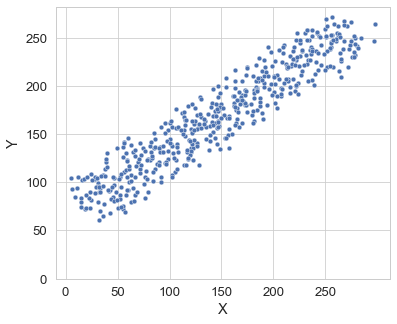

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=uv_df, x="X", y="Y")
plt.xticks(ticks=range(0, 300, 50))
plt.yticks(ticks=range(0, 280, 50))

plt.show()

# [3] Implementation

### Sample logic

Compute cost minimization on a multivariate dataset using matrix **multiplication technique**.

In [9]:
alpha = 1  # learning rate
theta = np.array([2, -1, 4, 3])  # Theta

# Input variables or Features.
X = np.array(
    [
        [20, 2, 100],
        [26, 1, 103],
        [25, 0, 109],
        [24, 5, 102],
        [29, 4, 100],
    ]
)

# Output variable or Target.
Y = np.array([300, 301, 302, 303, 304])

m, n = get_shape(X)
X_0 = np.ones((m, 1), X.dtype)
X = np.hstack((X_0, X))

print("θ shape:", get_shape(theta))
print("X shape:", get_shape(X))
print("Y shape:", get_shape(Y))

# Model
h = np.matmul(theta, X.transpose())
print("Hypothesis:", h)
print("Hypothesis Shape:", get_shape(h))

error = h - Y
print("Error:", error)
print("Error shape:", get_shape(error))

# Slope of cost function.
slope = (alpha / m) * np.matmul(X.transpose(), error)
print("Slope:", slope)

# Updated Theta.
print("New Theta:", theta - slope)

θ shape: (4, None)
X shape: (5, 4)
Y shape: (5, None)
Hypothesis: [290 289 304 304 289]
Hypothesis Shape: (5, None)
Error: [-10 -12   2   1 -15]
Error shape: (5, None)
Slope: [  -6.8 -174.6  -17.4 -683.2]
New Theta: [  8.8 173.6  21.4 686.2]


<IPython.core.display.Javascript object>

> Note:
> 1. In general Gradient descent is susceptible to **multiple local optima**.
> 2. Cost function for **Linear Regression** is always a bowl shaped function hence Gradient descent always **results in global optima**.

### Final implementation

In [10]:
def gradient_descent(X, Y, theta, alpha=0.5):
    """
    Function to compute derivative of Squared Error cost function for Gradient Descent algorithm.
    Using multiplication technique.
    """
    m, n = get_shape(X)
    # m: Total number for records or data-points
    # n: Total number for input-variables or features.

    if not n:
        # Reshape NumPy array to vector.
        text("Reshaping NumPy array, univeriate feature X, to vector.")
        X = X.reshape((m, 1))

    # Dummy feature x0 for y-intercept or theta-zero.
    X_0 = np.ones((m, 1), X.dtype)

    # Horizontally append X0 to Features.
    X = np.hstack((X_0, X))

    text("X shape:", get_shape(X))
    text("Y shape:", get_shape(Y))
    text("θ shape:", get_shape(theta))

    hypothesis = np.matmul(theta, X.transpose())
    error = hypothesis - Y
    slope = (alpha / m) * np.matmul(X.transpose(), error)

    # Return updated Theta.
    return np.around(theta - slope, 4)

<IPython.core.display.Javascript object>

#### Minimize Squared Error Cost Function

In [11]:
def plot_models():
    theta_bucket = []
    LIMIT = 4

    def plot_model(theta, axes):
        sns.scatterplot(data=uv_df, x="X", y="Y", ax=axes)

        t0, t1 = theta
        x_pts = range(0, 300)
        y_pts = [t0 + t1 * x for x in x_pts]
        sns.lineplot(x=x_pts, y=y_pts, color="red", ax=axes)
        axes.set_title(f"θ: {theta.tolist()}")

    def push_theta(theta):
        nonlocal theta_bucket
        theta_bucket.append(theta)

        if len(theta_bucket) == LIMIT:
            fig, axes = plt.subplots(1, LIMIT, figsize=(17, 3))

            for i in range(0, LIMIT):
                plot_model(theta_bucket[i], axes[i])

            plt.show()

            theta_bucket = []

    return push_theta

<IPython.core.display.Javascript object>

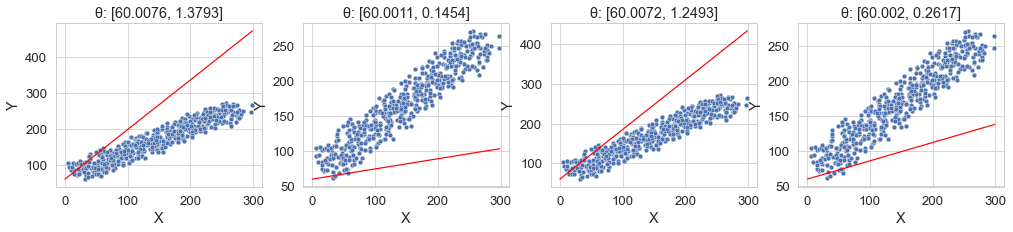

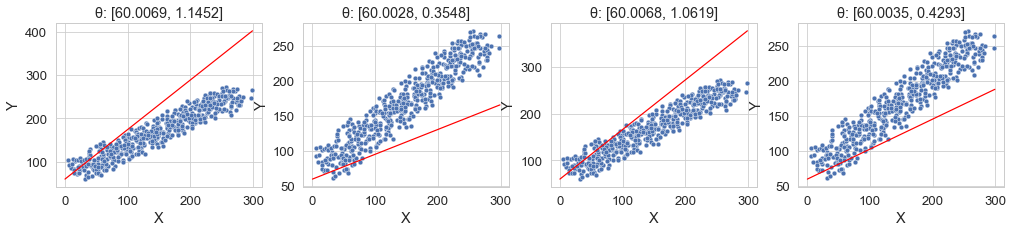

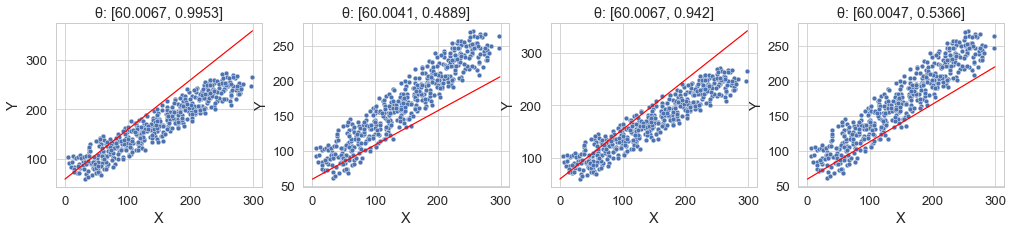

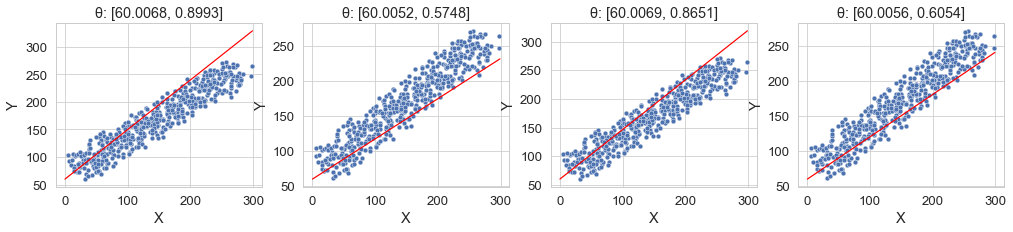

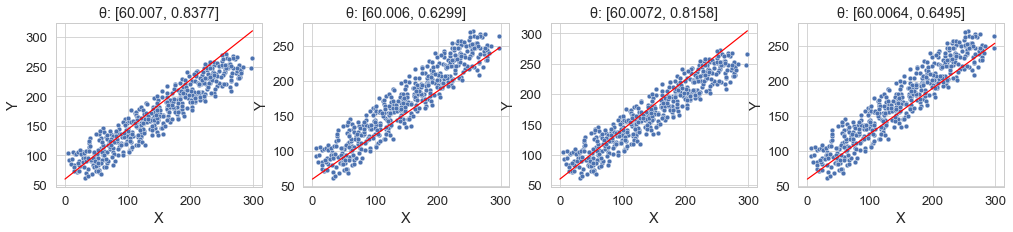

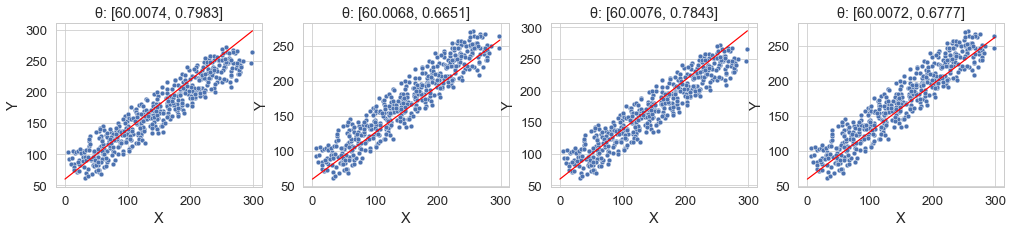

<IPython.core.display.Javascript object>

In [12]:
X = uv_df["X"].values
Y = uv_df["Y"].values
theta = np.array([60, 0])

pt = plot_models()

iterations = 24
for i in range(0, iterations + 1):
    theta = gradient_descent(X, Y, theta, alpha=0.00007)
    pt(theta)

# [5] Appendix

Cost Function using **traditional looping technique**.

In [13]:
def gradient_descent_2(X, Y, theta, alpha=0.5):
    """
    Function to compute derivative of Squared Error cost function for Gradient Descent algorithm.
    Using traditional looping technique.
    """
    m, n = get_shape(X)
    # m: Total number for records or data-points
    # n: Total number for input-variables or features.

    if not n:
        # Reshape NumPy array to vector.
        text("Reshaping NumPy array, univeriate feature X, to vector.")
        X = X.reshape((m, 1))

    # Dummy feature x0 for y-intercept or theta-zero.
    X_0 = np.ones((m, 1), X.dtype)

    # Horizontally append X0 to Features.
    X = np.hstack((X_0, X))

    text("X shape:", get_shape(X))
    text("Y shape:", get_shape(Y))
    text("θ shape:", get_shape(theta))

    def h(x):
        # Calculate hypothesis:
        # h = t0*x0 + t1*x1 + t2*x2 + ... + tn*xn
        hypothesis = 0
        for idx, xi in enumerate(x):
            hypothesis += theta[idx] * xi

        return hypothesis

    new_theta = np.array([])
    for idx, t in enumerate(theta):
        sigma = 0
        for i, data_point in enumerate(X):
            # Calculate squared error:
            # (h(X0) - y0) + (h(X1) - y1) + ... + (h(Xm) - ym)
            error = h(data_point) - Y[i]
            sigma += data_point[idx] * error

        slope = (alpha / m) * sigma
        new_theta = np.append(new_theta, round(t - slope, 4))

    # Return updated Theta.
    return new_theta

<IPython.core.display.Javascript object>

#### Test 1: Univariate Dataset

Expected updated theta values:
```
[114.393, 9852.442]
```
> Note: Check `alpha` (learning rate) if the output is different.

In [14]:
X = uv_df["X"].values
Y = uv_df["Y"].values
theta = np.array([60, 0])

ut = gradient_descent_2(X, Y, theta)
print("Updated theta:", ut.tolist())

Updated theta: [114.393, 9852.442]


<IPython.core.display.Javascript object>

#### Test 2: Multivariate Dataset

Expected updated theta values:
```
[8.8, 173.6,  21.4, 686.2]
```

In [15]:
X = np.array(
    [
        [20, 2, 100],
        [26, 1, 103],
        [25, 0, 109],
        [24, 5, 102],
        [29, 4, 100],
    ]
)
Y = np.array([300, 301, 302, 303, 304])
theta = np.array([2, -1, 4, 3])

ut = gradient_descent_2(X, Y, theta)
print("Updated theta:", ut.tolist())

Updated theta: [5.4, 86.3, 12.7, 344.6]


<IPython.core.display.Javascript object>